In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=1)
%matplotlib inline

In [72]:
re_data = pd.read_csv('data/shinhan_card/CARD_SPENDING_RESIDENT/CARD_SPENDING_RESIDENT.txt', delimiter='\t', parse_dates=['STD_DD'])

In [73]:
re_data.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,2019-02-01,110,517,10,F,25,11,595
1,2019-02-01,110,517,10,F,50,5,243
2,2019-02-01,110,517,10,F,55,5,27
3,2019-02-01,110,517,10,M,20,11,243
4,2019-02-01,110,517,10,M,25,11,433


In [74]:
re_data.tail()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
2537748,2020-05-31,350,720,81,M,45,19,127
2537749,2020-05-31,350,720,81,M,50,33,211
2537750,2020-05-31,350,720,81,M,55,9,61
2537751,2020-05-31,350,720,81,M,60,19,194
2537752,2020-05-31,350,720,81,M,65,5,29


In [75]:
re_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537753 entries, 0 to 2537752
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   STD_DD      datetime64[ns]
 1   GU_CD       int64         
 2   DONG_CD     int64         
 3   MCT_CAT_CD  int64         
 4   SEX_CD      object        
 5   AGE_CD      int64         
 6   USE_CNT     int64         
 7   USE_AMT     int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 154.9+ MB


In [76]:
re_data.shape

(2537753, 8)

In [77]:
re_data.isnull().sum()

STD_DD        0
GU_CD         0
DONG_CD       0
MCT_CAT_CD    0
SEX_CD        0
AGE_CD        0
USE_CNT       0
USE_AMT       0
dtype: int64

In [78]:
re_data.GU_CD.value_counts()

350    761412
260    746820
140    667106
110    362415
Name: GU_CD, dtype: int64

In [79]:
re_data.DONG_CD.value_counts()

670    144986
640    127335
550    108809
680    105980
540    103374
570     97804
595     94899
580     94525
520     91711
590     89509
625     81089
630     80088
560     69696
665     62836
565     60065
650     57814
695     53205
575     49697
600     48723
605     48695
545     44764
615     43799
690     43572
651     41552
619     39166
621     38954
611     38483
624     37937
510     36796
635     36593
602     35544
561     33169
700     32201
610     32091
620     30731
652     30579
720     29328
710     29018
517     28247
530     27521
645     26585
612     24990
662     24352
661     23441
601     21333
585     19767
660     16400
Name: DONG_CD, dtype: int64

In [80]:
re_data.MCT_CAT_CD.value_counts()

40    326560
80    326471
81    291322
70    280001
71    211651
21    158288
33    143343
50    122479
62    111545
22     99595
42     94797
92     70101
20     67506
10     58095
44     50400
52     29515
35     26769
34     24659
32     16120
43     13810
60      6666
30      6102
31      1958
Name: MCT_CAT_CD, dtype: int64

In [81]:
re_data.SEX_CD.value_counts()

M    1295256
F    1242497
Name: SEX_CD, dtype: int64

In [82]:
re_data.AGE_CD.value_counts()

45    287695
50    280996
40    269982
25    264405
35    263903
30    256633
55    252090
65    221656
60    220820
20    219573
Name: AGE_CD, dtype: int64

In [83]:
re_data['year'] = re_data['STD_DD'].dt.year
re_data['month'] = re_data['STD_DD'].dt.month
re_data['day'] = re_data['STD_DD'].dt.day
re_data.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,year,month,day
0,2019-02-01,110,517,10,F,25,11,595,2019,2,1
1,2019-02-01,110,517,10,F,50,5,243,2019,2,1
2,2019-02-01,110,517,10,F,55,5,27,2019,2,1
3,2019-02-01,110,517,10,M,20,11,243,2019,2,1
4,2019-02-01,110,517,10,M,25,11,433,2019,2,1


In [84]:
def concatenate_year_month(STD_DD):
    return '{0}-{1}'.format(STD_DD.year, STD_DD.month)

re_data['year_month'] = re_data['STD_DD'].apply(concatenate_year_month)

In [85]:
def concatenate_month_day(STD_DD):
    return '{0}-{1}'.format(STD_DD.month, STD_DD.day)

re_data['month_day'] = re_data['STD_DD'].apply(concatenate_month_day)

In [86]:
re_data.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,year,month,day,year_month,month_day
0,2019-02-01,110,517,10,F,25,11,595,2019,2,1,2019-2,2-1
1,2019-02-01,110,517,10,F,50,5,243,2019,2,1,2019-2,2-1
2,2019-02-01,110,517,10,F,55,5,27,2019,2,1,2019-2,2-1
3,2019-02-01,110,517,10,M,20,11,243,2019,2,1,2019-2,2-1
4,2019-02-01,110,517,10,M,25,11,433,2019,2,1,2019-2,2-1


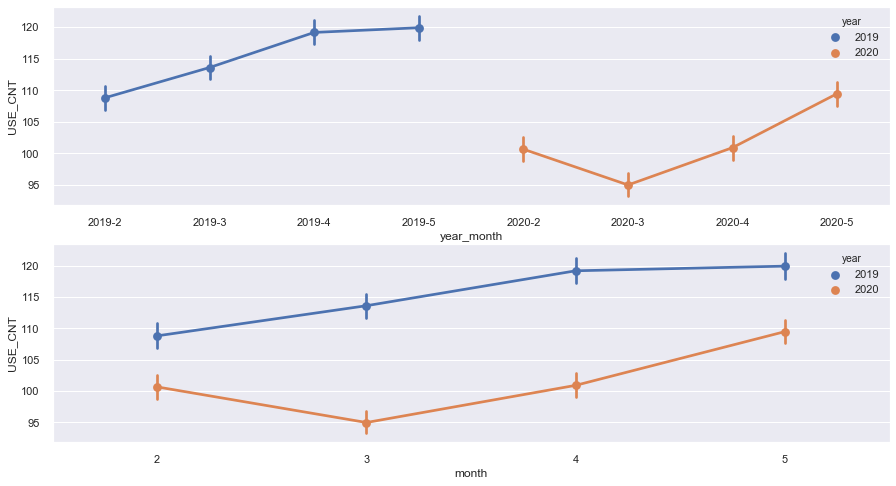

In [92]:
fig, ax = plt.subplots(2,1,figsize=(15,8))
sns.pointplot(data=re_data, x='year_month', y='USE_CNT', hue='year', ax=ax[0], join=True)
sns.pointplot(data=re_data, x='month', y='USE_CNT', hue='year', ax=ax[1], join=True)
plt.show()

In [93]:
re_data_19 = re_data[re_data['year'] == 2019].reset_index()
re_data_20 = re_data[re_data['year'] == 2020].reset_index()

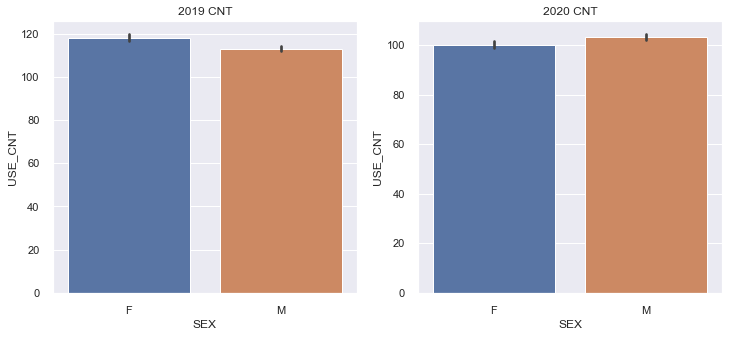

In [94]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

sns.barplot(data=re_data_19, x='SEX_CD', y='USE_CNT', ax=ax[0])
ax[0].set(title='2019 CNT', xlabel = 'SEX', ylabel='USE_CNT')
sns.barplot(data=re_data_20, x='SEX_CD', y='USE_CNT', ax=ax[1])
ax[1].set(title='2020 CNT', xlabel = 'SEX', ylabel='USE_CNT')
plt.show()